In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 

In [17]:
# define parameters and functions:
alpha = .95
epsilon = .3
L = 2*np.pi
Ma = 0.5

In [18]:
def RHS(t,S):
    N = len(S)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    p = 1/S -Ma/S**2 - epsilon**2*fft.ifft(n**2*(2*np.pi/L*1j)**2*fft.fft(S))#-1/S**2*np.cos(t/2) #p = 1/S-epsilon^2 S_zz
    p_z = fft.ifft(n*(2*np.pi/L*1j)*fft.fft(p))
    factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2 
    #print(np.min(factor))
    dSdt = fft.ifft(n*2*np.pi/L*1j*fft.fft((p_z - 1)*factor)).real/3/S/16 #(S^2)_t
    #print(np.min(S), np.max(S))
    return dSdt

2


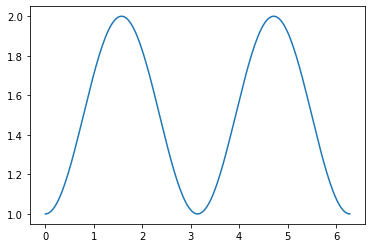

1.0


/var/folders/wx/hvlspwk90qj6x4ybxggkjycr0000gn/T/ipykernel_75511/2028157249.py:7: RuntimeWarning: invalid value encountered in log
  factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2


(200, 300)


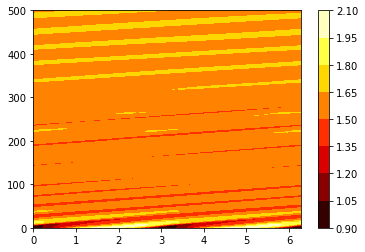

In [19]:
T = 500
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0,T, 300)
t_span = (0,T)
u0 = (1.1 - np.cos(z*k))/2 + alpha
plt.plot(z, u0);plt.show()
print(np.min(u0))
#u0 = np.exp(-(z-np.pi)**2)/2 + alpha
result_ivp = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-2, t_eval =t)
u = result_ivp.y
print(np.shape(u))
Z,T = np.meshgrid(z,t)
plt.contourf(Z,T,u.T, cmap ='hot')
plt.colorbar()

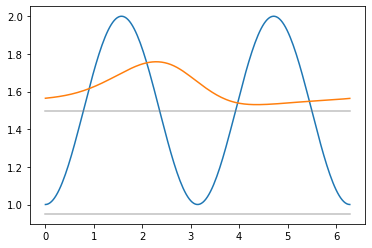

In [20]:
plt.plot(z, u[:,0]); plt.plot(z, u[:,-1]); plt.plot(z, alpha * np.ones_like(z), color='grey', alpha=0.5); 
plt.plot(z, np.mean(u0)* np.ones_like(z), color='grey', alpha=0.5)

0.00010670840803235909


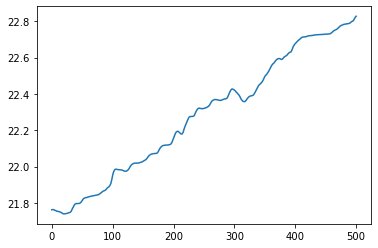

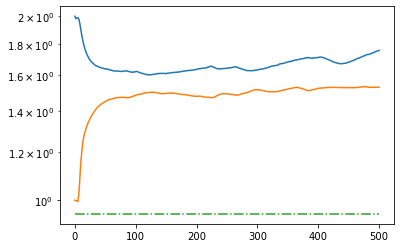

In [21]:
#expected lambda:
Lambda_exp = k**2/16*(epsilon**2*k**2-1)*((alpha**2-1)**2-2*(alpha**2-1-2*np.log(alpha)))
print(Lambda_exp)
plt.plot(t, np.linalg.norm(u, axis=0))
plt.show()
plt.semilogy(t, np.max(u, axis=0))
#plt.semilogy(t, np.max(u, axis=0)[0]*np.exp(Lambda_exp*t), '-.')
plt.semilogy(t, np.min(u, axis=0))
plt.semilogy(t, np.ones_like(t)*alpha, '-.')

In [705]:
def RHS_thin_film(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + eta_z + epsilon**2*eta_zzz))).real
    return deta_dt

In [654]:
def RHS_thin_film(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + eta_z + epsilon**2*eta_zzz))).real
    return deta_dt


## intermediate equation
def RHS_intermediate(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3/(1+eta/alpha)*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + eta/alpha)*(1 + eta_z/(alpha**2*(1+eta/alpha)**2) + epsilon**2*eta_zzz))).real
    return deta_dt
    
    
    

(300, 300) (300, 300) (300, 300)


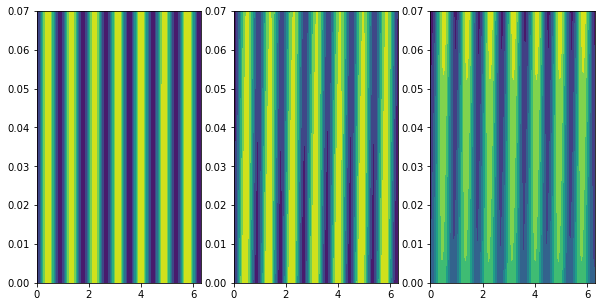

In [655]:
T = .07
k = 1/epsilon/np.sqrt(2)
h0 =.05; delta = 0.95
z = np.linspace(0, 2*np.pi, 300)
t = np.linspace(0,T, 300)
t_span = (0,T)
Z,T = np.meshgrid(z,t)
u0 = h0 *(1 - delta*np.cos(z*k)) + alpha
#u0 = np.exp(-(z-np.pi)**2)+1
result_exact = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-10, t_eval =t)
result_intermediate = scipy.integrate.solve_ivp(RHS_intermediate, t_span, u0, 'BDF', atol = 1e-10, t_eval =t)
result_thin = scipy.integrate.solve_ivp(RHS_thin_film, t_span, u0, 'BDF', atol = 1e-10, t_eval =t)
u_exact = result_exact.y
u_interm = result_intermediate.y
u_thin = result_thin.y
print(np.shape(u_exact), np.shape(u_interm), np.shape(u_thin))


fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

ax[0].contourf(Z,T,u_exact.T)
ax[1].contourf(Z,T,u_interm.T)
ax[2].contourf(Z,T,u_thin.T)
#ax[2].contourf(Z,T,np.abs(u_exact.T-u_interm.T), cmap='hot')
plt.show()


0.0010416666666666693


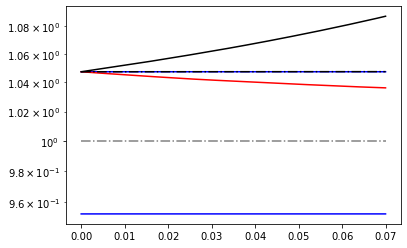

In [656]:
Lambda_exp = k**2/16*(epsilon**2*k**2-1)*((alpha**2-1)**2-2*(alpha**2-1-2*np.log(alpha)))
Lambda_thin = -k**2*(epsilon**2*k**2-1)*(1-alpha)**3/3
print(Lambda_thin)
plt.semilogy(t,np.max(u_exact, axis=0), color='blue'); plt.semilogy(t,np.min(u_exact, axis=0), color = 'blue')
plt.semilogy(t,np.max(u_interm, axis=0), color='red')
plt.semilogy(t,np.max(u_thin, axis=0), color='black')
plt.semilogy(t, np.max(u_thin, axis=0)[0]*np.exp(Lambda_thin*t), '-.', color='black')
plt.semilogy(t, np.ones_like(t)*(h0+alpha), '-.',color='black',alpha = .5)

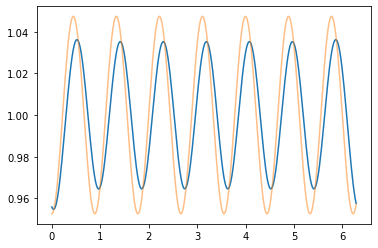

In [657]:
plt.plot(z, u_interm[:,-1]); plt.plot(z, u_interm[:,0], alpha=.5)
#plt.ylim([0, np.max(u_interm[:,0])])

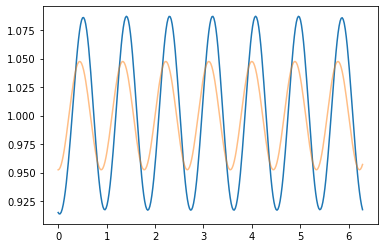

In [658]:
plt.plot(z, u_thin[:,-1]); plt.plot(z, u_thin[:,0], alpha=.5)
#plt.ylim([0, np.max(u_thin[:,0])])

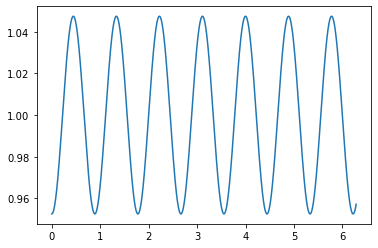

In [659]:
z = np.linspace(0, 2*np.pi, 10000)
u0 = h0 *(1 - delta*np.cos(z*k)) + alpha
plt.plot(z, u0)